In [1]:
## THIS DATASET CONTAIS HISTORIAL DATA ABOUT THE TITANIC DISASTER.
## OUR MAIN GOAL IS TO CORRECTLY PREDICT, BASE ON SOME FEATURES, 
## WHO WILL DIE AND WHO WILL SURVIVE.

In [2]:
## OVERVIEW
# 1) UNDERSTAND THE DATA (INFO, DESCRIBE, Nº OF MISSING VALUES, ETC...)
# 2) DATA EXPLORATION
# 3) DATA CLEANING
# 4) FEATURE ENGINEERING
# 5) MODEL BUILDING 
# 6) MODEL PERFORMANCE
# 7) RESULTS 

In [3]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
print('Train Shape:',train_df.shape)

Train Shape: (891, 12)


In [12]:
print('Test Shape:',test_df.shape)

Test Shape: (418, 11)


In [13]:
###Train missing data
100*train_df.isnull().sum()/(train_df.shape[0]*train_df.shape[1])

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            1.655443
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          6.425365
Embarked       0.018706
dtype: float64

In [14]:
print('Test Shape:',test_df.shape)

Test Shape: (418, 11)


In [15]:
###Test missing data
100*test_df.isnull().sum()/(test_df.shape[0]*test_df.shape[1])

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            1.870378
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.021749
Cabin          7.111788
Embarked       0.000000
dtype: float64

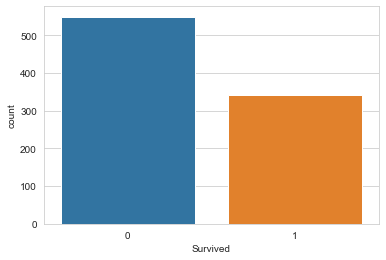

In [16]:
#How many survived??
sns.countplot(x='Survived',data=train_df)


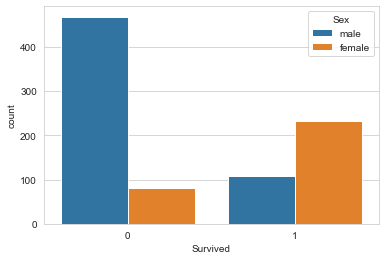

In [17]:
#How many male and female survived?
sns.countplot(x='Survived',hue='Sex',data=train_df)

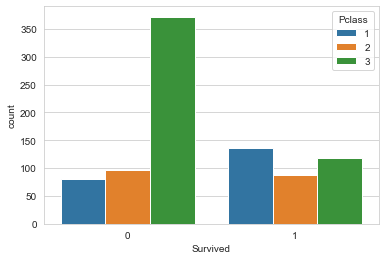

In [18]:
#was the class important to survive?
sns.countplot(x='Survived',hue='Pclass',data=train_df)

In [19]:
##It really was

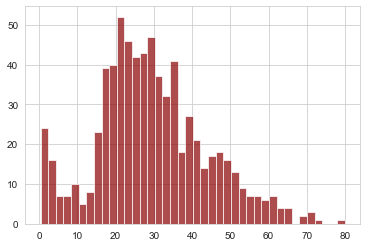

In [20]:
#Anaylis of deaths for age
train_df['Age'].dropna().hist(bins=40,color='darkred',alpha=0.7)

In [21]:
def range_age(Age):
    if 0 <= Age <=10:
        return 'Range 0-10'
    elif 10< Age <=20:
        return 'Range 10-20'
    elif 20 < Age <= 40:
        return 'Range 20-40'
    elif 40 < Age <= 60:
        return 'Range 40-60'
    else:
        return 'Range 60-80+'

In [22]:
for df in [train_df,test_df]:
    df['Age_range'] = df['Age'].apply(range_age)

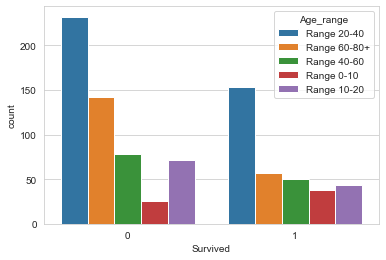

In [23]:

sns.countplot(x='Survived',hue='Age_range',data=train_df)

In [24]:
#people between 20-40 had  high likelihood of dying

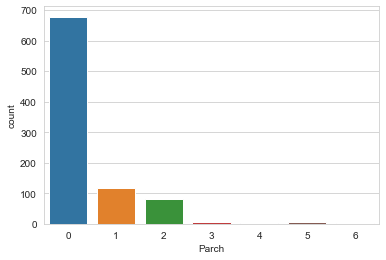

In [25]:
#How many with parent/children?
sns.countplot(x='Parch',data=train_df)

In [26]:
def is_alone(cols):
    sibsp = int(cols[0])
    parch = int(cols[1])
    alone = sibsp + parch
    if alone == 0:
        return 1
    else:
        return 0

In [27]:
for df in [train_df,test_df]:
    df['is_alone'] = df[['SibSp','Parch']].apply(is_alone,axis=1)

In [28]:
train_df[['SibSp','Parch','is_alone']]

,SibSp,Parch,is_alone
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,1,2,0
889,0,0,1


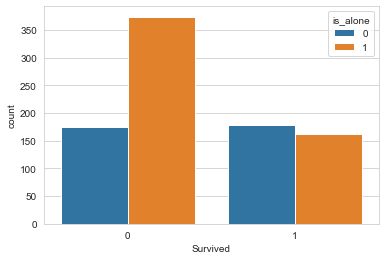

In [29]:
# being alone was an important factor?
sns.countplot(x='Survived',hue='is_alone',data=train_df)


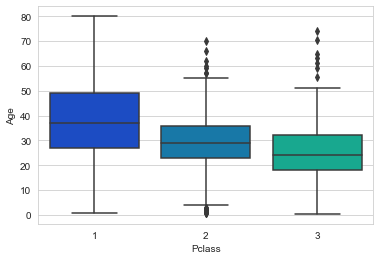

In [30]:
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

In [31]:
def imput_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    
    else:
        return Age

In [32]:
for df in [train_df,test_df]:
    df['Age'] = df[['Age','Pclass']].apply(imput_age,axis=1)

In [33]:
train_df['Cabin'].nunique()

147

In [34]:
## too many values to fillna. We simply drop it
train_df = train_df.drop(['Cabin','PassengerId','SibSp','Parch','Ticket'],axis=1)
test_df = test_df.drop(['Cabin','PassengerId','SibSp','Parch','Ticket'],axis=1)

In [35]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_range,is_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Range 20-40,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Range 20-40,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Range 20-40,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Range 20-40,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Range 20-40,1


In [36]:
train_df.isnull().any()

Survived     False
Pclass       False
Name         False
Sex          False
Age          False
Fare         False
Embarked      True
Age_range    False
is_alone     False
dtype: bool

In [37]:
train_df.groupby('Embarked').mean()

,Survived,Pclass,Age,Fare,is_alone
Embarked,,,,,
C,0.553571,1.886905,30.410238,59.954144,0.505952
Q,0.389610,2.909091,26.188312,13.276030,0.740260
S,0.336957,2.350932,29.269798,27.079812,0.610248


In [38]:
train_df[train_df['Embarked'].isnull() == True]

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_range,is_alone
61,1,1,"Icard, Miss. Amelie",female,38.0,80.0,NaN,Range 20-40,1
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,80.0,NaN,Range 60-80+,1


In [39]:
def fill_embark(col):
    embarked = col[0]
    fare = col[1]
    if pd.isnull(embarked):
        if fare <= 20:
            return 'Q'
        elif 20<fare<=45 :
            return 'S'
        else:
            return 'C'
    else:
        return embarked

In [40]:
train_df['Embarked'] = train_df[['Embarked','Fare']].apply(fill_embark,axis=1)

In [41]:
train_df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
Fare         0
Embarked     0
Age_range    0
is_alone     0
dtype: int64

In [42]:
test_df.isnull().any()

Pclass       False
Name         False
Sex          False
Age          False
Fare          True
Embarked     False
Age_range    False
is_alone     False
dtype: bool

In [43]:
test_df.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [44]:
test_df[test_df['Fare'].isnull() == True]

,Pclass,Name,Sex,Age,Fare,Embarked,Age_range,is_alone
152,3,"Storey, Mr. Thomas",male,60.5,NaN,S,Range 60-80+,1


In [45]:
##Pclass = 3
test_df['Fare'] = test_df['Fare'].fillna(12.459678)

In [46]:
test_df.isnull().any()

Pclass       False
Name         False
Sex          False
Age          False
Fare         False
Embarked     False
Age_range    False
is_alone     False
dtype: bool

In [47]:

train_df.select_dtypes(include=[object]).columns

Index(['Name', 'Sex', 'Embarked', 'Age_range'], dtype='object')

In [48]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train_df ['Title'] = train_df['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col','Countess','Jonkheer'],'Other' )
train_df ['Title'] = train_df['Title'].replace('Mme','Mrs')
train_df ['Title'] = train_df['Title'].replace('Ms','Miss')
train_df ['Title'] = train_df['Title'].replace('Mlle','Mrs')
train_df['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Capt'], dtype=object)

In [49]:
#What happened to the captain?
train_df[train_df['Title'] == 'Capt']['Survived']

745    0
Name: Survived, dtype: int64

In [50]:
##He actually died.
train_df ['Title'] = train_df['Title'].replace('Capt','Other' )
train_df['Title'].unique()



array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [51]:
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
test_df ['Title'] = test_df['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col','Countess','Jonkheer','Dona'],'Other' )
test_df ['Title'] = test_df['Title'].replace('Mme','Mrs')
test_df ['Title'] = test_df['Title'].replace('Ms','Miss')
test_df ['Title'] = test_df['Title'].replace('Mlle','Mrs')
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

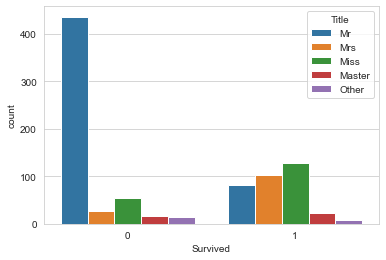

In [52]:

sns.countplot(x='Survived',hue='Title',data=train_df)

In [53]:
train_df = train_df.drop('Name',axis=1)
test_df = test_df.drop('Name',axis=1)

In [54]:
train_df['Fare_range'] = pd.qcut(train_df['Fare'],4)

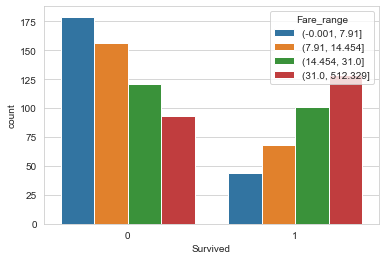

In [55]:
sns.countplot(x='Survived',data=train_df,hue='Fare_range')

In [56]:
##Its crystal clear that the more they paid, the higher your
##likelihood of surviving.

In [57]:
test_df['Fare_range'] = pd.qcut(test_df['Fare'],4)

In [58]:
train_df = train_df.drop('Fare',axis=1)
test_df = test_df.drop('Fare',axis=1)

In [59]:
n_train = train_df.shape[0]

In [60]:

all_data = pd.concat([train_df,test_df])

In [61]:
all_data = pd.get_dummies(all_data)

In [62]:
#split to train and test again
train = all_data[:n_train]
test = all_data[n_train:]

In [63]:
test = test.drop('Survived',axis=1)

In [64]:
train.select_dtypes(include=[object]).columns

Index([], dtype='object')

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [68]:
#Since the outcome is classified as belonging to two classes:
#survived or not survived, it is reasonable to build a regression model

In [69]:
## Models:
# 1) Logistic Regression
# 2) Naive Bayes
# 3) Decision Tree
# 4) Random Forest
# 5) Knn
# 6) SVC
# 7) XGB Classifier
# 8) Voting Classifier

In [70]:
#SCALING THE DATA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [71]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [72]:
from sklearn.model_selection import cross_val_score


In [73]:
# 1.a) Logistic Regression scaled data
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=2000)
cv = cross_val_score(logmodel,X_train_scaled,y_train,cv=10)
print(cv)
linear_score_scaled = cv.mean()
print(linear_score_scaled)


[0.86567164 0.8358209  0.85074627 0.76119403 0.88059701 0.76119403
 0.85074627 0.86567164 0.8030303  0.8030303 ]
0.8277702397105381


In [74]:
# 1.b) Logistic Regression unscaled data
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=2000)
cv = cross_val_score(logmodel,X_train,y_train,cv=10)
print(cv)
linear_score = cv.mean()
print(linear_score)

[0.82089552 0.80597015 0.85074627 0.76119403 0.88059701 0.74626866
 0.85074627 0.86567164 0.8030303  0.8030303 ]
0.8188150158299411


In [75]:
# 2.a) Naive Bayes scaled data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=10)
print(cv)
gnb_score_scaled = cv.mean()
print(gnb_score_scaled)





[0.88059701 0.82089552 0.82089552 0.74626866 0.88059701 0.68656716
 0.82089552 0.8358209  0.75757576 0.75757576]
0.8007688828584352


In [76]:
# 2.b) Naive Bayes unscaled data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=10)
print(cv)
gnb_score = cv.mean()
print(gnb_score)


[0.88059701 0.82089552 0.82089552 0.74626866 0.88059701 0.68656716
 0.82089552 0.8358209  0.75757576 0.75757576]
0.8007688828584352


In [77]:
# 3.a) Decision Tree scaled data
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
cv = cross_val_score(dtree,X_train_scaled,y_train,cv=10)
print(cv)
dtree_score_scaled = cv.mean()
print(dtree_score_scaled)




[0.89552239 0.79104478 0.80597015 0.73134328 0.76119403 0.67164179
 0.70149254 0.89552239 0.81818182 0.87878788]
0.795070104025328


In [78]:
# 3.b) Decision Tree unscaled data
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
cv = cross_val_score(dtree,X_train,y_train,cv=10)
print(cv)
dtree_score = cv.mean()
print(dtree_score)


[0.86567164 0.7761194  0.80597015 0.71641791 0.76119403 0.73134328
 0.68656716 0.88059701 0.81818182 0.86363636]
0.7905698778833107


In [79]:
# 4.a) Random Forest scaled data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
cv = cross_val_score(rfc,X_train_scaled,y_train,cv=10)
print(cv)
rfc_score_scaled = cv.mean()
print(rfc_score_scaled)


[0.88059701 0.85074627 0.85074627 0.71641791 0.76119403 0.73134328
 0.79104478 0.91044776 0.77272727 0.8030303 ]
0.8068294889190412


In [80]:
# 4.b) Random Forest unscaled data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
cv = cross_val_score(rfc,X_train,y_train,cv=10)
print(cv)
rfc_score = cv.mean()
print(rfc_score)

[0.88059701 0.85074627 0.85074627 0.70149254 0.74626866 0.74626866
 0.79104478 0.91044776 0.77272727 0.81818182]
0.8068521031207597


In [81]:
# 5.a) KNN scaled data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=10)
print(cv)
knn_score_scaled = cv.mean()
print(knn_score_scaled)


[0.85074627 0.8358209  0.80597015 0.76119403 0.86567164 0.71641791
 0.74626866 0.79104478 0.71212121 0.78787879]
0.7873134328358209


In [82]:
# 5.b) KNN unscaled data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=10)
print(cv)
knn_score = cv.mean()
print(knn_score)

[0.8358209  0.80597015 0.8358209  0.68656716 0.7761194  0.70149254
 0.74626866 0.8358209  0.74242424 0.81818182]
0.7784486657620986


In [83]:
# 6.a) SVC scaled data
from sklearn.svm import SVC
svc_model = SVC(probability=True)
cv = cross_val_score(svc_model,X_train_scaled,y_train,cv=10)
print(cv)
svc_model_score_scaled = cv.mean()
print(svc_model_score_scaled)


[0.89552239 0.82089552 0.82089552 0.74626866 0.88059701 0.73134328
 0.82089552 0.8358209  0.81818182 0.78787879]
0.8158299412030756


In [84]:
# 6.b) SVC unscaled data
from sklearn.svm import SVC
svc_model = SVC(probability=True)
cv = cross_val_score(svc_model,X_train,y_train,cv=10)
print(cv)
svc_model_score = cv.mean()
print(svc_model_score)




[0.70149254 0.67164179 0.6119403  0.6119403  0.64179104 0.58208955
 0.59701493 0.65671642 0.63636364 0.6969697 ]
0.6407960199004975


In [85]:
#7.a) XGB scaled data
from xgboost import XGBClassifier
xgb = XGBClassifier()
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=10)
print(cv)
xgb_score = cv.mean()
print(xgb_score)

[0.88059701 0.8358209  0.8358209  0.70149254 0.80597015 0.7761194
 0.7761194  0.85074627 0.78787879 0.89393939]
0.8144504748982362


In [86]:
#8) voting-classifier
# model score > 0.8
#(SVC,XGB,logistRegre,RandomForest,Naive Bayes)

In [87]:
from sklearn.ensemble import VotingClassifier
          

In [88]:
voting_soft = VotingClassifier(estimators=[('logmodel',logmodel),('knn',knn),('rfc',rfc),('gnb',gnb),('svc_model',svc_model),('xgb',xgb)],voting ='soft')
cv = cross_val_score(voting_soft,X_train_scaled,y_train,cv=10)
print(cv)
voting_soft_score = cv.mean()
print(voting_soft_score)

[0.88059701 0.82089552 0.8358209  0.74626866 0.86567164 0.73134328
 0.8358209  0.86567164 0.83333333 0.81818182]
0.8233604703753956


In [89]:
models = pd.DataFrame({'Model':['Logistic Regression Scaled Data','Logistic Regression Unscaled Data ','Naive Bayes Scaled Data','Naive Bayes Unscaled Data','Decision Tree Scaled Data','Decision Tree Unscaled Data','Random Forest Scaled Data','Random Forest Unscaled Data','KNN Scaled Data','KNN Unscaled Data','SVC Scaled Data','SVC Unscaled Data','XGB','Voting Classifier'],'Score':[linear_score_scaled,linear_score,gnb_score_scaled,gnb_score,dtree_score_scaled,dtree_score,rfc_score_scaled,rfc_score,knn_score_scaled,knn_score,svc_model_score_scaled,svc_model_score,xgb_score,voting_soft_score]}).sort_values('Score',ascending=False)

In [90]:
models.head(5)

,Model,Score
0,Logistic Regression Scaled Data,0.827770
13,Voting Classifier,0.823360
1,Logistic Regression Unscaled Data,0.818815
10,SVC Scaled Data,0.815830
12,XGB,0.814450


In [91]:
##Tuning Models 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [92]:
#Logistic Regression
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
             'penalty' : ['none','l1','l2','elasticnet'],
             'C' : np.logspace(-4,4,20),
             'solver' : ['liblinear','newton-cg','lbfgs','sag','saga']}

grid_lr = GridSearchCV(lr,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
best_grid_lr = grid_lr.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 1925 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 1993 out of 2000 | elapsed:   55.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   56.0s finished


In [93]:
grid_lr_score = best_grid_lr.best_score_
print('LogisticRegression Tuned:',grid_lr_score)
print('Best Parameters:', best_grid_lr.best_params_)

LogisticRegression Tuned: 0.815856806194591
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [94]:
#SVC 
svc_model = SVC(probability = True)
param_grid = {'kernel' : ['rbf','linear','poly'],
             'C' : np.logspace(-4,4,20),
             'gamma' : ['scale']}

grid_svc_model = GridSearchCV(svc_model,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
best_grid_svc_model = grid_svc_model.fit(X_train_scaled,y_train)
grid_svc_score = best_grid_svc_model.best_score_
print('SVC Tuned:',grid_svc_score)
print('Best Parameters:', best_grid_svc_model.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.7s


SVC Tuned: 0.8323869374929863
Best Parameters: {'C': 206.913808111479, 'gamma': 'scale', 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.2min finished


In [95]:
#KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : range(1,21,2),
             'weights' : ['uniform','distance'],
             'metric' : ['euclidean','manhattan','minkowski']}

grid_knn = GridSearchCV(knn,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
best_grid_knn = grid_knn.fit(X_train_scaled,y_train)
grid_knn_score = best_grid_knn.best_score_
print('KNN Tuned:',grid_knn_score)
print('Best Parameters:', best_grid_knn.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.6s


KNN Tuned: 0.8143979351363484
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.6s finished


In [96]:
#RandomForest
rfr = RandomForestClassifier()
param_grid = {'n_estimators' : [10,100,1000],
             'max_features' : ['auto','sqrt']}

grid_rfr = GridSearchCV(rfr,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
best_grid_rfr = grid_rfr.fit(X_train_scaled,y_train)
grid_rfr_score = best_grid_rfr.best_score_
print('RandomForest Tuned:',grid_rfr_score)
print('Best Parameters:', best_grid_rfr.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.0s finished


RandomForest Tuned: 0.79947256200202
Best Parameters: {'max_features': 'sqrt', 'n_estimators': 100}


In [97]:
#XGB
xgb = XGBClassifier()
param_grid = {'n_estimators' : [10,100,1000],
             'learning_rate' : [0.001,0.01,0.1,0.2],
             'subsample' : [0.5,0.7,0.9],
             'max_depth': [3,7,9,None]}

grid_xgb = GridSearchCV(xgb,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
best_grid_xgb = grid_xgb.fit(X_train_scaled,y_train)
grid_xgb_score = best_grid_xgb.best_score_
print('XGB Tuned:',grid_xgb_score)
print('Best Parameters:', best_grid_xgb.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:  1.6min


XGB Tuned: 0.842834698687016
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.9}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.4min finished


In [98]:
best_logmodel = best_grid_lr.best_estimator_
best_svc = best_grid_svc_model.best_estimator_
best_knn = best_grid_knn.best_estimator_
best_rfc = best_grid_rfr.best_estimator_
best_xgb = best_grid_xgb.best_estimator_

In [99]:
voting_best = VotingClassifier(estimators=[('logmodel',best_logmodel),('knn',best_knn),('rfc',best_rfc),('svc_model',best_svc),('xgb',best_xgb)],voting ='soft')
cv = cross_val_score(voting_best,X_train_scaled,y_train,cv=10)
print(cv)
voting_best_score = cv.mean()
print(voting_best_score)

[0.85074627 0.88059701 0.86567164 0.71641791 0.86567164 0.73134328
 0.82089552 0.91044776 0.78787879 0.84848485]
0.8278154681139757


In [100]:
models2 = pd.DataFrame({'Model':['Logistic Regression Tuned','SVC Tuned','KNN Tuned','Random Forest Tuned','XGB Tuned','Voting Classifier'],'Score':[grid_lr_score,grid_svc_score,grid_knn_score,grid_rfr_score,grid_xgb_score,voting_best_score]}).sort_values('Score',ascending=False)

In [101]:
models2

,Model,Score
4,XGB Tuned,0.842835
1,SVC Tuned,0.832387
5,Voting Classifier,0.827815
0,Logistic Regression Tuned,0.815857
2,KNN Tuned,0.814398
3,Random Forest Tuned,0.799473


In [102]:
models3 = pd.DataFrame({'Model':['Logistic Regression Tuned','SVC Tuned','XGB Tuned','Voting Classifier Tuned','Logistic Regression Scaled Data','Voting Classifier','SVC Scaled Data','XGB'],'Score':[grid_lr_score,grid_svc_score,grid_xgb_score,voting_best_score,linear_score_scaled,voting_soft_score,svc_model_score_scaled,xgb_score]}).sort_values('Score',ascending=False)

In [103]:
models3[models3['Score']>0.819]

,Model,Score
2,XGB Tuned,0.842835
1,SVC Tuned,0.832387
3,Voting Classifier Tuned,0.827815
4,Logistic Regression Scaled Data,0.827770
5,Voting Classifier,0.823360


In [104]:
#MAKE PREDICTIONS
test_results = test.copy()
test_results_scaled = scaler.transform(test_results.values)
len(test)


418

In [105]:
#XGB
best_xgb.fit(X_train_scaled,y_train)
Y_pred_xgbtuned = best_xgb.predict(test_results_scaled)
submission_xgb = pd.DataFrame({'PassangerId' : range(892,1310),'Survived':Y_pred_xgbtuned})
submission_xgb.to_csv('OVJ_Titanic_xgb.csv',index=False)


In [106]:
#SVC
best_svc.fit(X_train_scaled,y_train)
Y_pred_svctuned = best_svc.predict(test_results_scaled)
submission_svc = pd.DataFrame({'PassangerId' : range(892,1310),'Survived':Y_pred_svctuned})
submission_svc.to_csv('OVJ_Titanic_svc.csv',index=False)

In [107]:
#VotingTuned
voting_best.fit(X_train_scaled,y_train)
Y_pred_votingtuned = voting_best.predict(test_results_scaled)
submission_votingtuned = pd.DataFrame({'PassangerId' : range(892,1310),'Survived':Y_pred_votingtuned})
submission_votingtuned.to_csv('OVJ_Titanic_voting_tuned.csv',index=False)

In [108]:
#Logistic Regression
logmodel.fit(X_train_scaled,y_train)
Y_pred_logmodel = logmodel.predict(test_results_scaled)
submission_logmodel = pd.DataFrame({'PassangerId' : range(892,1310),'Survived':Y_pred_logmodel})
submission_logmodel.to_csv('OVJ_Titanic_logmodel.csv',index=False)

In [109]:
#Voting
voting_soft.fit(X_train_scaled,y_train)
Y_pred_voting = voting_soft.predict(test_results_scaled)
submission_voting = pd.DataFrame({'PassangerId' : range(892,1310),'Survived':Y_pred_voting})
submission_voting.to_csv('OVJ_Titanic_voting.csv',index=False)